# Final project
In this project, the team will study and analyze data based on the Student Performance Factors dataset provided on Kaggle.

Based on data analysis, it will provide a comprehensive overview of the factors affecting students' academic performance in exams.

(Last update: 2/12/2024)

Group

---

## 1. Import necessary libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from statsmodels.formula.api import ols
import numpy as np

## 2. Exploring data

In [2]:
df = pd.read_csv('data/data.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


- Determine the number of rows and columns.

In [3]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 6607, Columns: 20


- Identify the attributes in the dataset.

In [4]:
print(df.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


- Determine the data type for each attribute.

In [5]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


- The percentage of missing values

In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


- Identify the min and max values for numerical attributes. Check if they are abnormal?

In [7]:
print(df.min(numeric_only=True))
print(df.max(numeric_only=True))

Hours_Studied         1
Attendance           60
Sleep_Hours           4
Previous_Scores      50
Tutoring_Sessions     0
Physical_Activity     0
Exam_Score           55
dtype: int64
Hours_Studied         44
Attendance           100
Sleep_Hours           10
Previous_Scores      100
Tutoring_Sessions      8
Physical_Activity      6
Exam_Score           101
dtype: int64


## 3. Preprocessing

- Remove duplicate, missing and anomaly data columns

In [8]:
df.dropna(inplace=True)
df.drop(df.index[df['Exam_Score'] == 101][0])
df.drop_duplicates(inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

- Perform data mapping and normalization.

In [9]:
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

binary_mapping = {
    'Yes': 1,
    'No': 0,
    'Public': 0,
    'Private': 1,
    'Male': 0,
    'Female': 1
}

peer_influence_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

parental_education_mapping = {
    'High School': 0,
    'College': 1,
    'Postgraduate': 2
}

distance_mapping = {
    'Near': 0,
    'Moderate': 1,
    'Far': 2
}

df['Parental_Involvement'] = df['Parental_Involvement'].map(ordinal_mapping)
df['Access_to_Resources'] = df['Access_to_Resources'].map(ordinal_mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(ordinal_mapping)
df['Family_Income'] = df['Family_Income'].map(ordinal_mapping)
df['Teacher_Quality'] = df['Teacher_Quality'].map(ordinal_mapping)

df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(binary_mapping)
df['Internet_Access'] = df['Internet_Access'].map(binary_mapping)

df['School_Type'] = df['School_Type'].map(binary_mapping)

df['Peer_Influence'] = df['Peer_Influence'].map(peer_influence_mapping)

df['Parental_Education_Level'] = df['Parental_Education_Level'].map(parental_education_mapping)

df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_mapping)

df['Gender'] = df['Gender'].map(binary_mapping)

df['Learning_Disabilities'] = df['Learning_Disabilities'].map(binary_mapping)

In [10]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,1,70
5,19,88,1,1,1,8,89,1,1,3,1,1,0,2,3,0,2,0,0,71
6,29,84,1,0,1,7,68,0,1,1,0,1,1,1,2,0,0,1,0,67
7,25,78,0,2,1,6,50,1,1,1,2,2,0,0,2,0,0,2,0,66
8,17,94,1,2,0,6,80,2,1,0,1,0,1,1,1,0,1,0,0,69
9,23,98,1,1,1,8,71,1,1,0,2,2,0,2,5,0,0,1,0,72


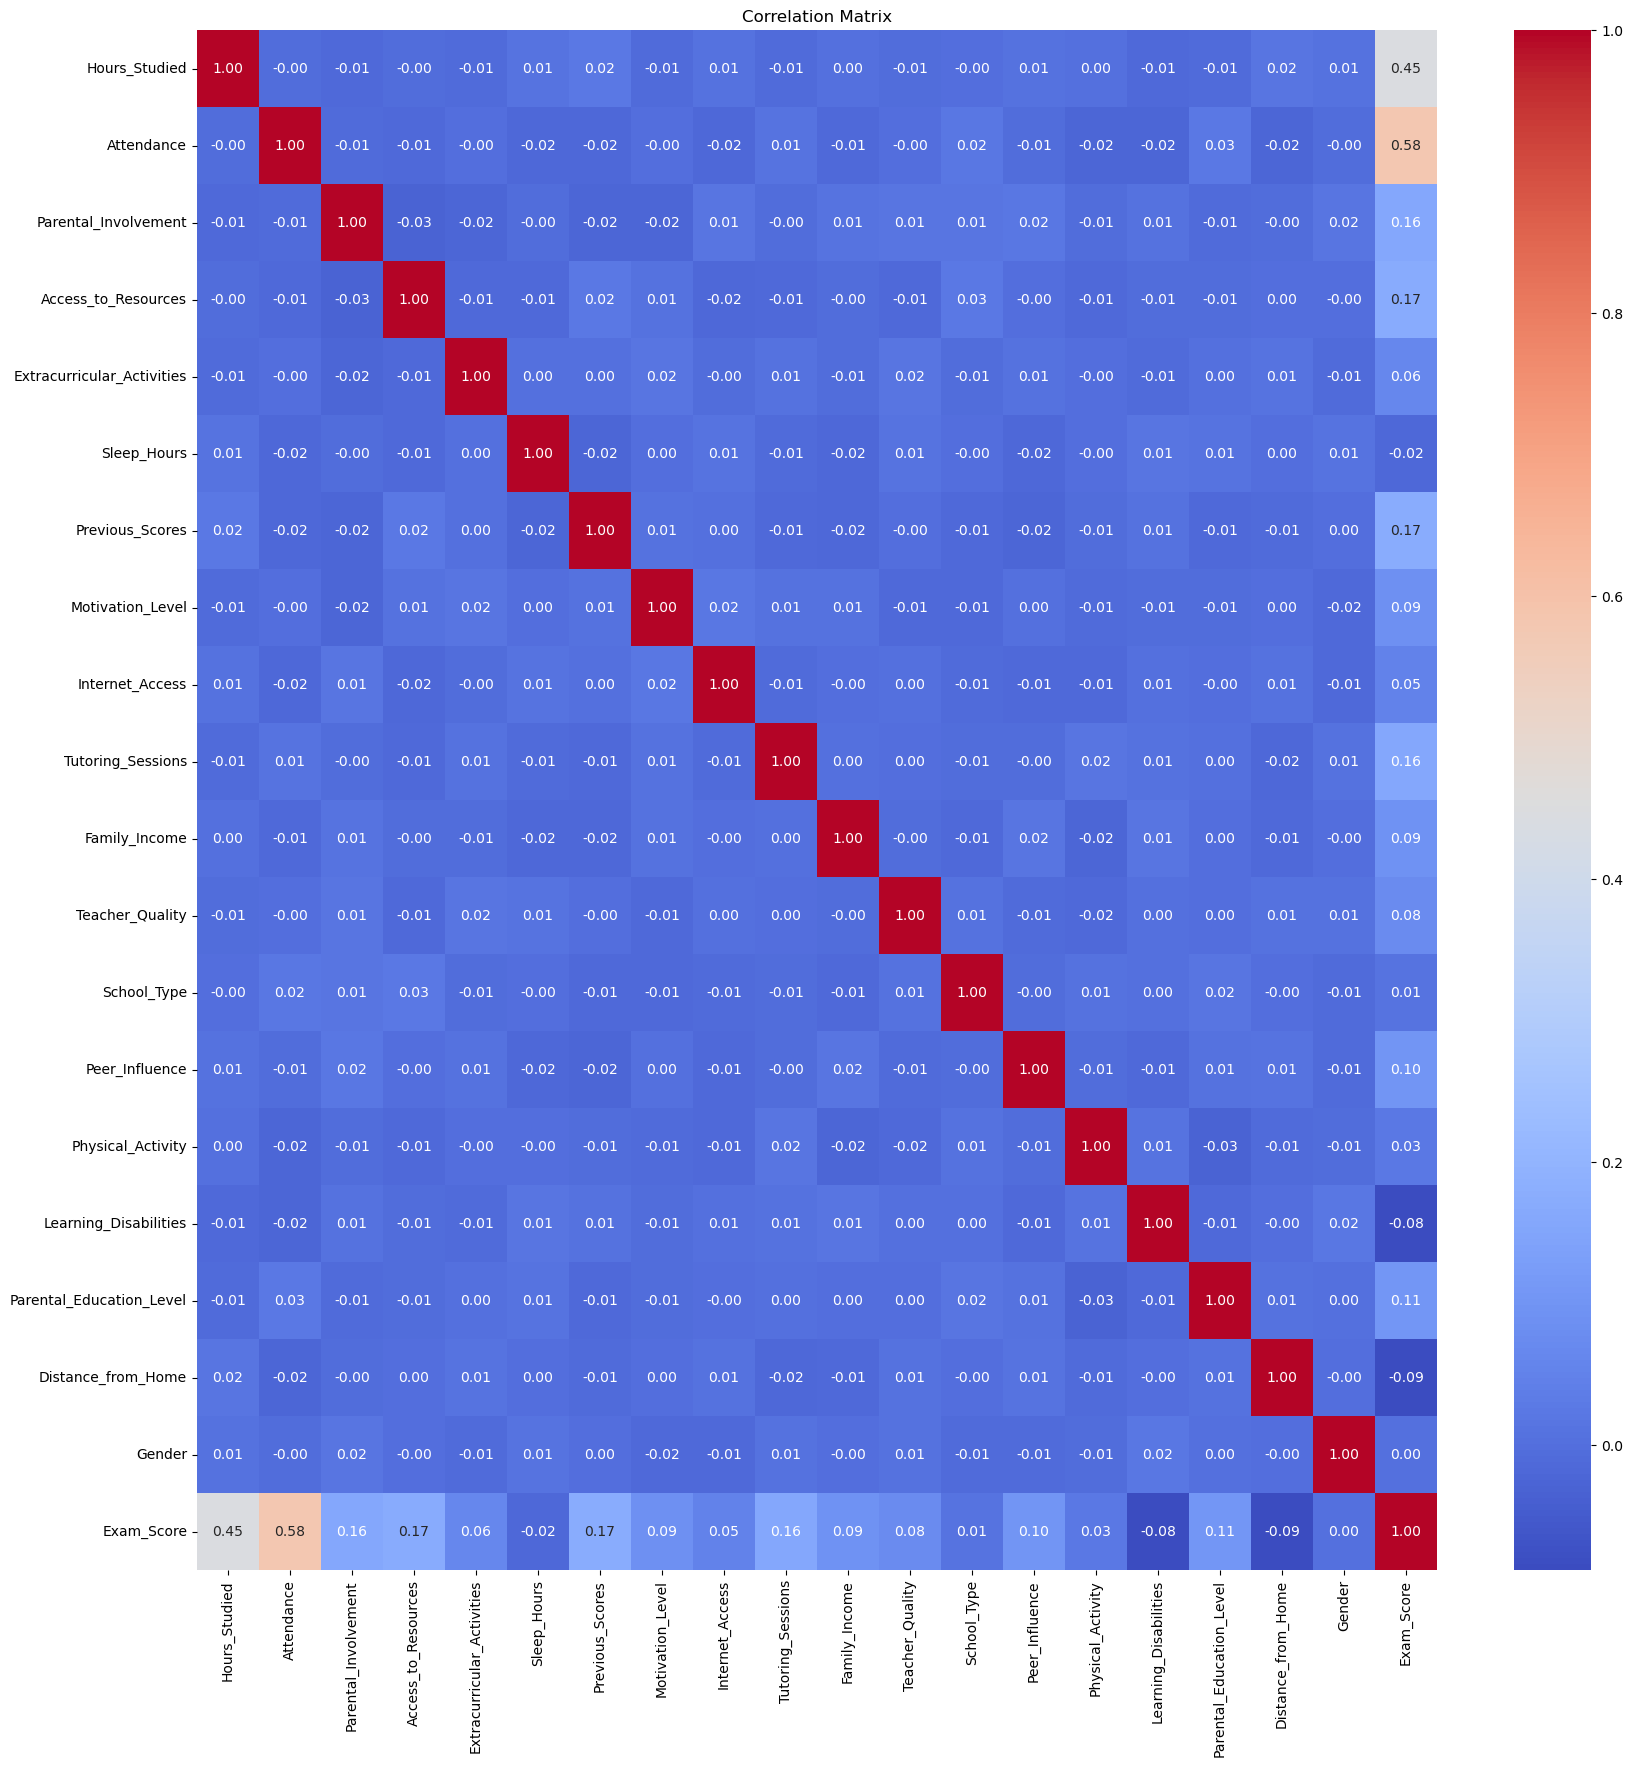

In [11]:
# Perform correlation analysis between Family Income, Teacher Quality, Extracurricular Activities, and Exam Score
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


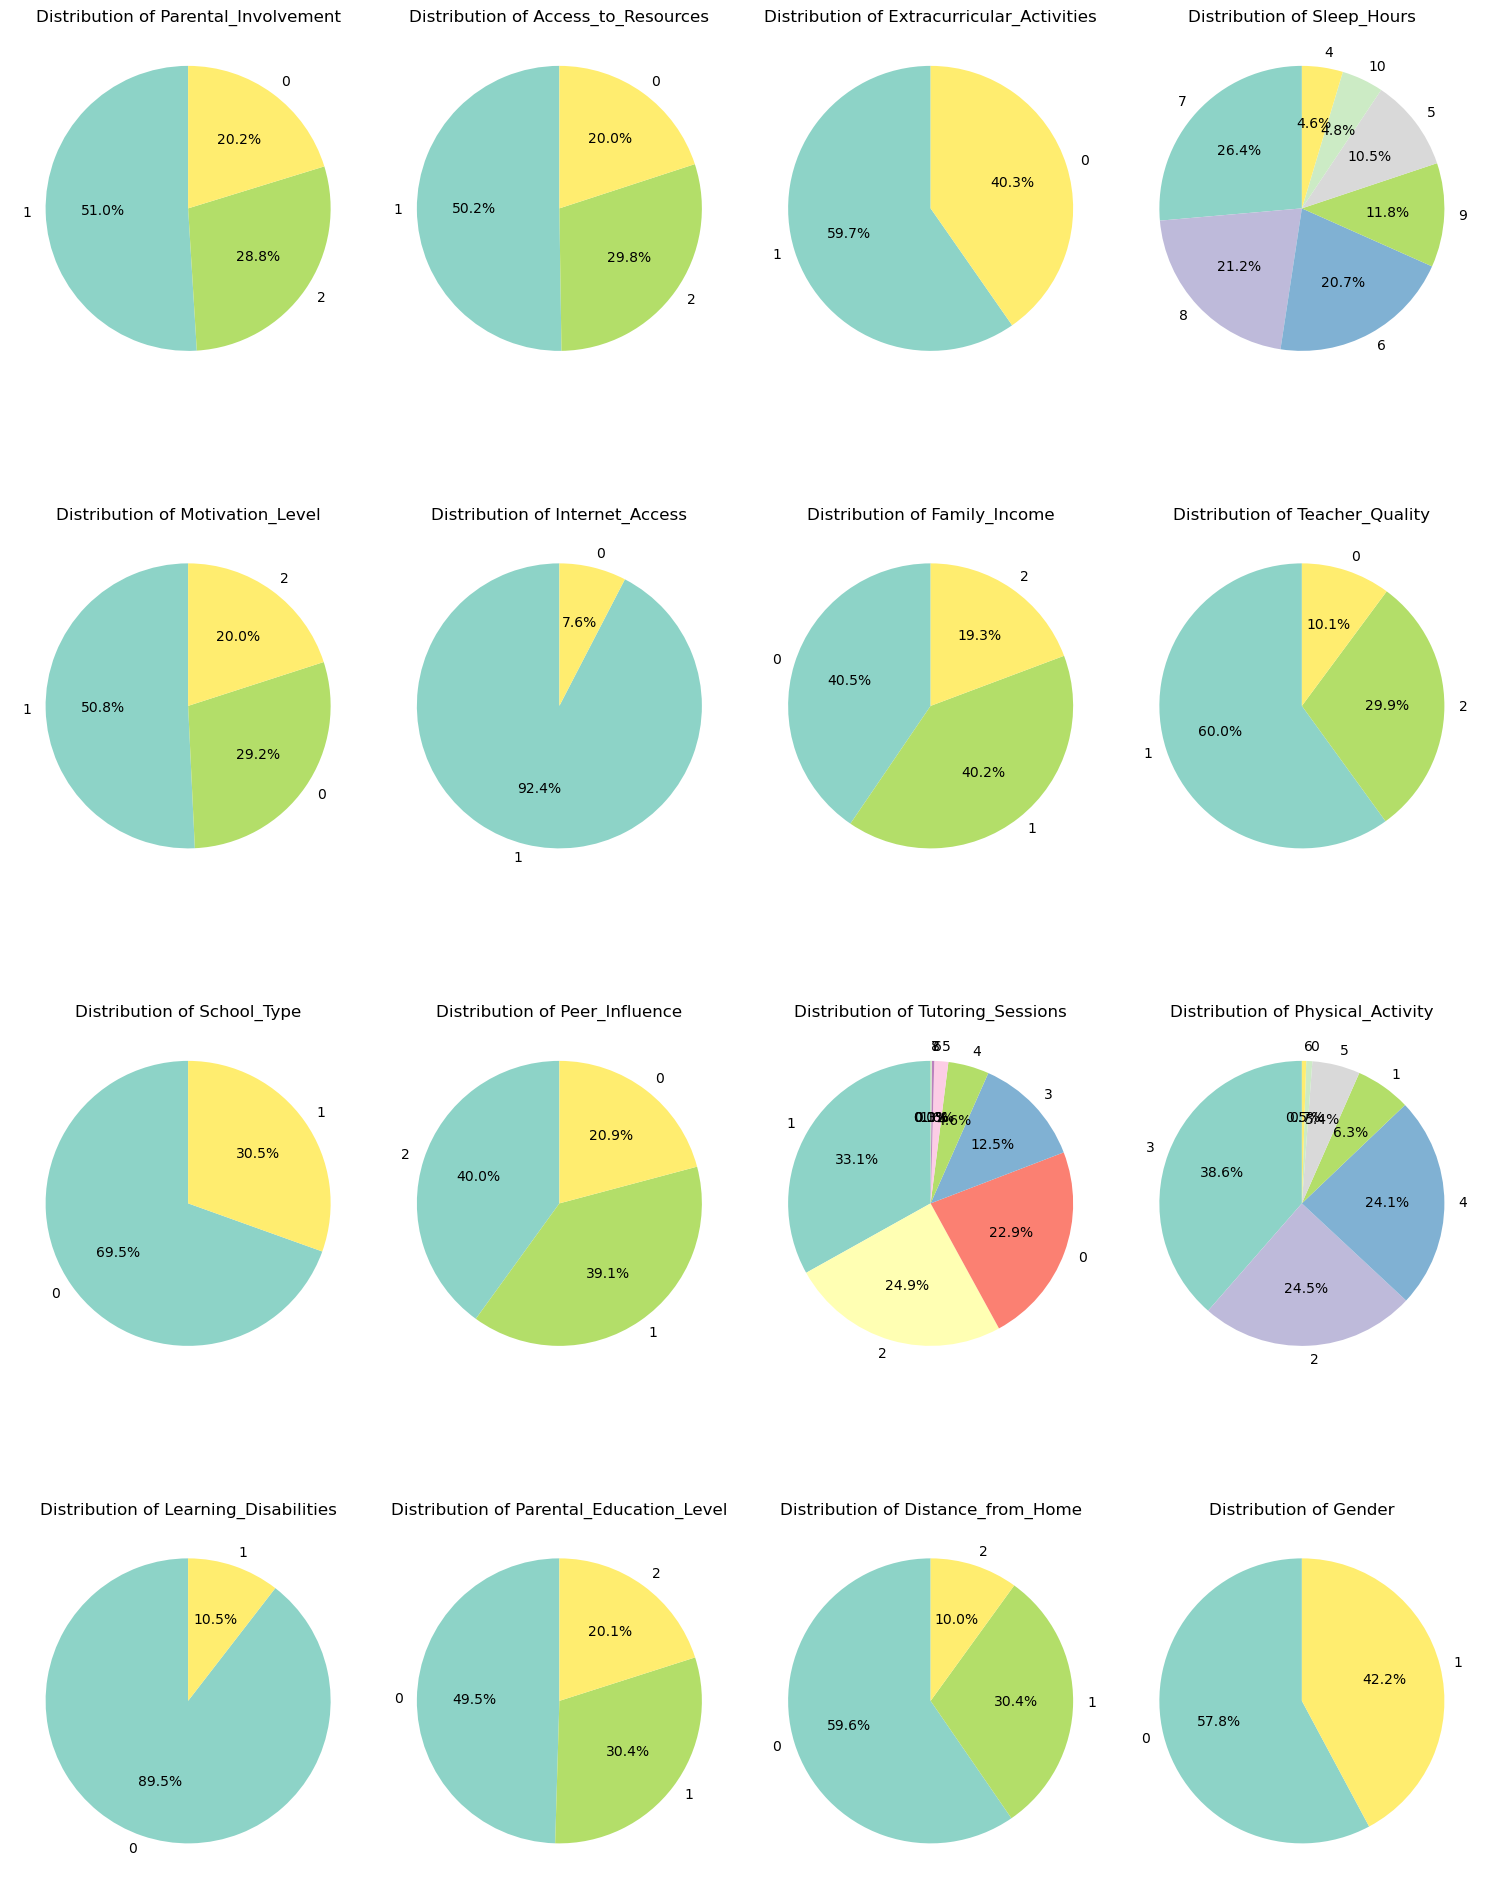

In [48]:
categorical_columns = df[['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Sleep_Hours','Motivation_Level',
                         'Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Tutoring_Sessions',
                          'Physical_Activity','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']].columns

# Calculate number of rows and columns dynamically
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust number of columns per row

# Plot using dynamic grid layout
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust the grid size for your dataset
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

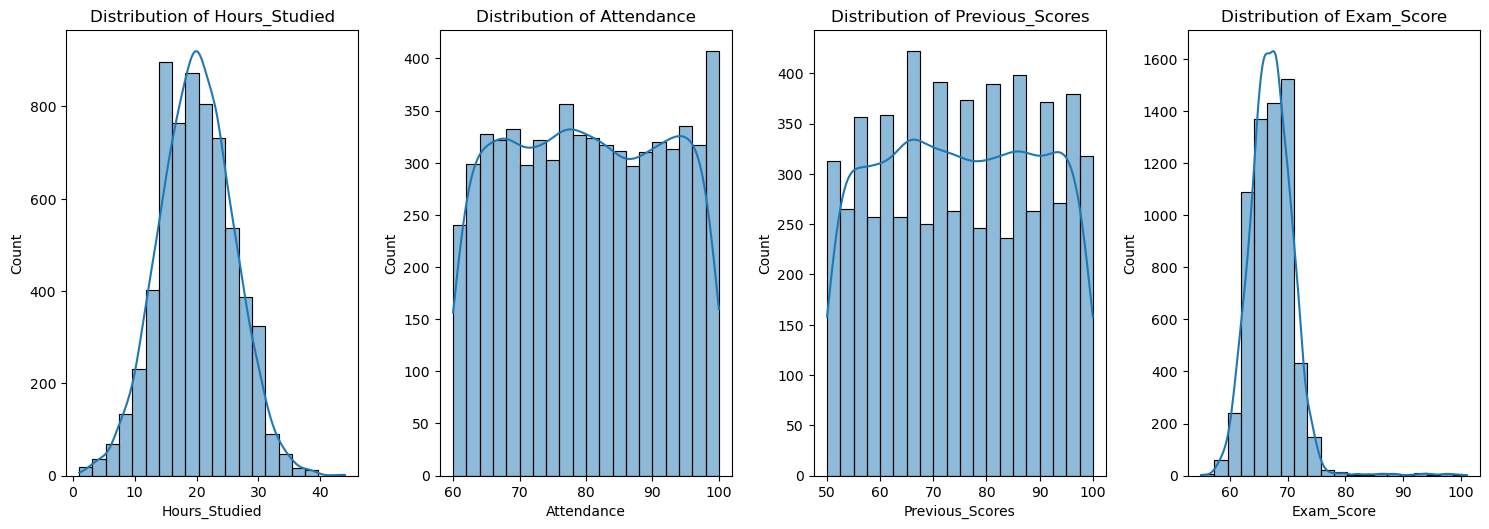

In [50]:
# List of columns you want to plot histograms for
count_columns = df[['Hours_Studied','Attendance','Previous_Scores','Exam_Score']].columns

# Calculate number of rows and columns dynamically
num_columns = len(count_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust number of columns per row

# Plot using dynamic grid layout
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(count_columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust based on the number of variables
    sns.histplot(df[column], kde=True, bins=20)  # Histogram with KDE curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## 4. Exploratory Data Analyst Questions

### 1. How does the combination of "Parental Involvement", "Attendance", and "Parental Education Level" affect students' "Exam Score"?

**Purpose**: Understand the interaction between parental involvement, attendance, and education level in influencing academic performance (exam scores).

**Steps**:
* **Data Preprocessing**: Convert categorical variables like "Parental Involvement" and "Parental Education Level" into numeric forms for analysis.
* **Multivariate Analysis**: Perform a correlation analysis to explore how these factors interact. Use scatter plots or 3D plots to visualize relationships.
* **Regression Analysis**: Use multiple linear regression or random forest regression to model the relationship between these features and the exam score.
* **Interaction Terms**: Introduce interaction terms in the regression to capture the combined effects of these features.

### 2. What impact does "Physical Activity" have on "Exam Score" when considering "Sleep Hours" and "Motivation Level" as moderators?

**Purpose**: Explore whether physical activity is an effective predictor of exam scores, especially when adjusted for sleep hours and motivation level, which could act as moderators.

**Steps**:
* **Data Preprocessing**: Convert categorical variables like "Physical Activity" and "Motivation Level" into numeric values.
* **Correlation Matrix**: Explore correlations between "Physical Activity", "Sleep Hours", "Motivation Level", and "Exam_Score".
* **Moderation Analysis**: Use a regression model with "Physical Activity", "Sleep Hours", and "Motivation Level" as predictors to see how they interact.
* **Visualization**: Create scatter plots or interaction plots to visualize the moderating effects.

### 3. Can we predict "Exam Score" using a combination of "Hours Studied", "Parental Involvement", and "School Type"? What features are most influential?

**Purpose**: Tests if we can predict exam scores based on these features and identifies the most influential ones.

**Steps**:
* **Data Preprocessing**: Encode categorical variables ("Parental Involvement" and "School Type") as numeric values, split dataset
* **Feature Correlation**: Use techniques like correlation analysis, mutual information, or feature importance (from tree-based models like random forests) to identify relevant features.
* **Modeling**: Train a regression model (e.g., Random Forest, Gradient Boosting) to predict exam scores.
* **Model Evaluation**: Evaluate the model's performance using metrics like RMSE or R².

After we have preprocess and mapping all the data above, we would like to explore whether the feature **"Hours Studied"**, **"Parental Involvement"** or **"School Type"** did afftect the **"Exam Score"**. In this question, we will explore that using Machine Learning model.

#### Data Preprocessing

First, we will get those feature above and split the dataset into train and test set for training.

In [12]:
Q_3 = df[['Hours_Studied', 'Parental_Involvement', 'School_Type', 'Exam_Score']].copy()

# Select relevant features and target for prediction
X = Q_3[['Hours_Studied', 'Parental_Involvement', 'School_Type']]  # Independent variables
y = Q_3['Exam_Score']  # Dependent variable

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Feature Correlation

After that, we will visualize the feature to see their correlation using Heatmap Plot.

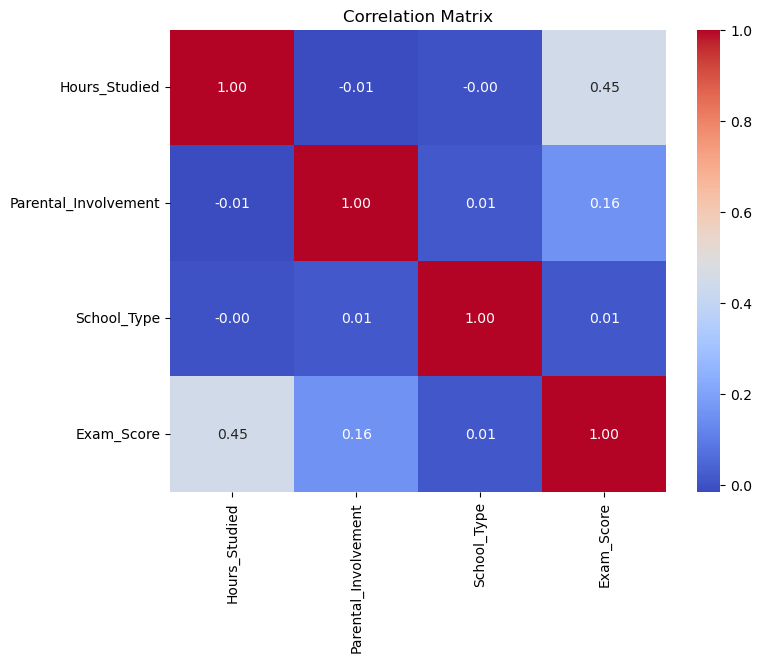

In [13]:
# Perform correlation analysis to examine relationships between features and target variable
correlation_matrix = Q_3[['Hours_Studied', 'Parental_Involvement', 'School_Type', 'Exam_Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

We can see that in this Correlation Matrix, not much feature in correlated with each other. Those with highest correlation are "Hour Studied" and "Exam Score" (**0.45**), which was really realistic in real life because without a doubt the more you learned, the greater your score will in most circumstance. But how much it affect with the prediction. That what we'll do in next section.

#### RandomForest Modeling

We will using RandomForesetRegressor for getting Feature Importance in these feature in percentage using those train and test dataset above.

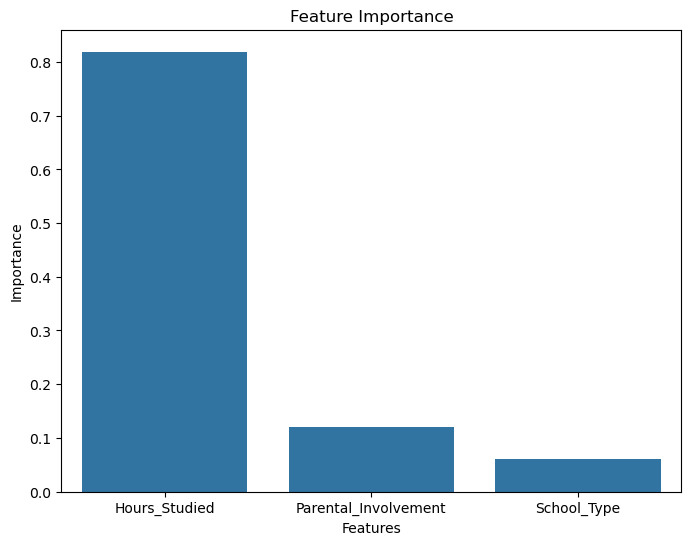

In [14]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame(model.feature_importances_, X.columns, columns=["Importance"])

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


We can see clearly that "Hours Studied" has a lot more more percentage of importance than "Parental Involvement" and "School Type". In real life, school type doesn't affect with your grade despite sometimes the more you level up your school grade, the harder you will get good score, but who are good will always good at anywhere they learn. About Parental Involvement, if we look about the past, the parental involvement will kinda affect a lot about your school grades because most of the time, without high technologies, your parents' influence did affect a lot you school grade. But now, with high technologies, things kinda different now.

#### Evaluation

We evaluate model using $RMSE$ and $R^2$ score

In [15]:
# Get predictions for the test set
y_pred = model.predict(X_test)

# Calculate R² score and RMSE for model evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output R² and RMSE scores
r2, rmse

(0.19590850372186674, 3.5188047053377893)

The $R^2$ score is 0.2136681023448277 and the $RMSE$ score is 3.3984059937399733 tells that the model is not kinda work with these feature. Maybe it based on the feature importance that we have discovered above that those **"Parental Involvement"** and **"School Type"** feature does not correlated well with the score. That's why it the evaluation models is not really good. 

Based on these exploratory, we conclude that these feature can not be combined to predict the exam score, except maybe "Hour Studied" alone still can make it though. And of course, **"Hour Studied"** is the most influential feature to predict **"Exam Score"** in these features.

### 5. How does the presence of extracurricular activities, peer influence, and sleep hours correlate with exam performance? How does peer influence interact with student extracurricular engagement?

**Purpose**: Help understand the role of extracurricular activities and peer influence in shaping student success.

**Steps**:
* **Groupby Analysis**: Group data by 'Extracurricular_Activities' and 'Peer_Influence' to calculate mean exam scores.
* **Visualization**:  Use bar plots or heatmaps to visualize the relationship between these variables and performance.
* **Statistical Test**: Conduct a chi-square test to evaluate if the relationship between extracurricular activities and peer influence is statistically significant with respect to exam performance.

#### Correlation Analysis

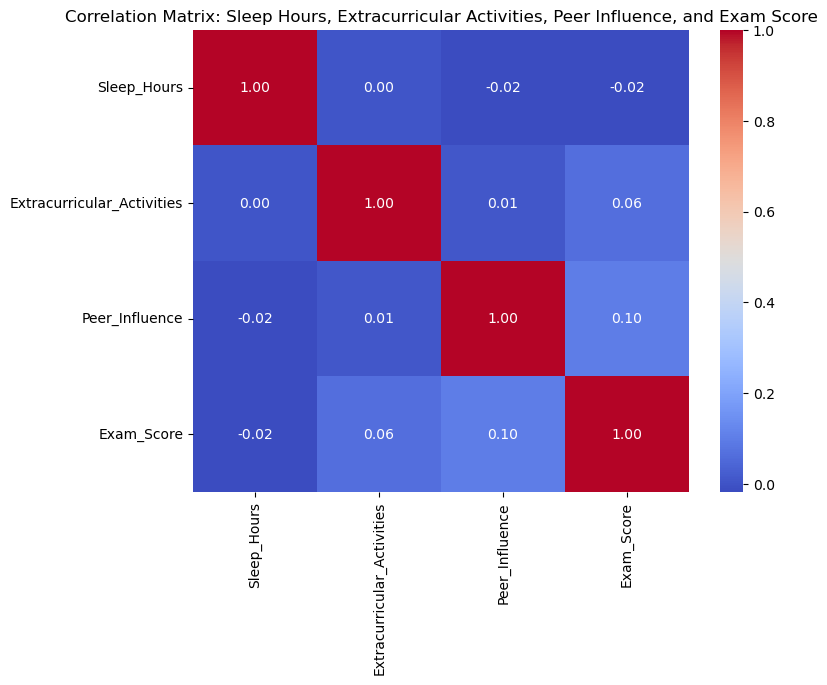

In [16]:
# Calculate correlation matrix for relevant features
correlation_matrix_5 = df[['Sleep_Hours', 'Extracurricular_Activities', 'Peer_Influence', 'Exam_Score']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Sleep Hours, Extracurricular Activities, Peer Influence, and Exam Score')
plt.show()


#### Groupby Analysis

We will now proceed to do Groupby Analysis with **Extracurricular Activities** and **Peer Influence** to see how these features interact with each other. First, we will groupby them and use boxplot and heatmap to visualize it.

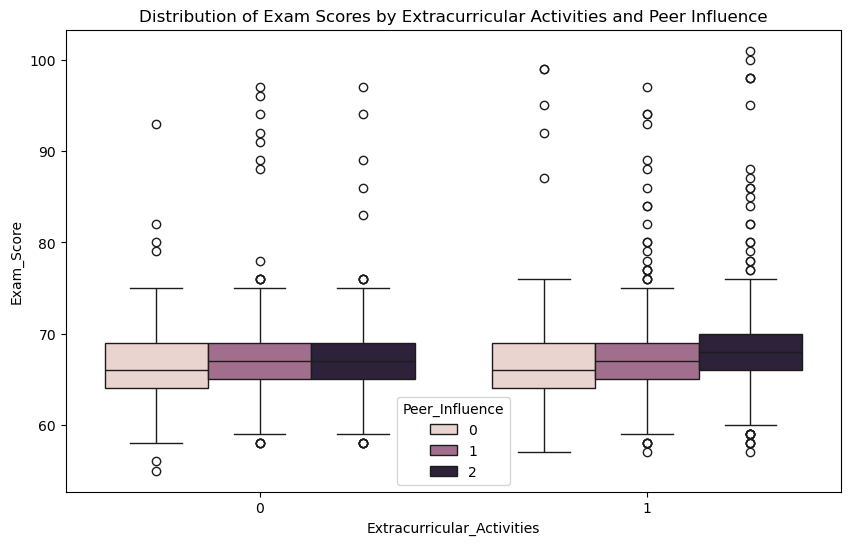

In [17]:
# Group by extracurricular activities and peer influence, and calculate the average exam score
grouped = df.groupby(['Extracurricular_Activities', 'Peer_Influence'])['Exam_Score'].mean().reset_index()

# Plot the distribution of exam scores by extracurricular activities and peer influence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', hue='Peer_Influence', data=df)
plt.title('Distribution of Exam Scores by Extracurricular Activities and Peer Influence')
plt.show()


With this boxplot, we will analyze within these 3 features of box:
* **Box**: We could see that with the label 0(No) and 1(Yes) of Extracurricular Activities, the box, means the 50% percentile of the Exam Score have no much difference, except that the label 1 is slightly higher than label 0 when compare with label 2(Positive). Talking about Peer Influence. We see that with the label 0(Negative), we see that the exam score is lower than other 2 labels, means that the negative emotion can really affect the Exam Score.
* **Outliers**: Both groups show outliers, but students involved in extracurricular activities tend to have fewer extreme scores (outliers), suggesting their performance is generally more consistent. Non-extracurricular students with negative peer influence have more extreme outliers, indicating there are a few students performing significantly worse.

Without any doubt, we see that the extracurricular activities and peer influence, which does realte to the emotion of the student, does affect the exam score with their respective attitude, with the positive really push it up and vice versa. The heatmap below is more highlight for this conclusion.

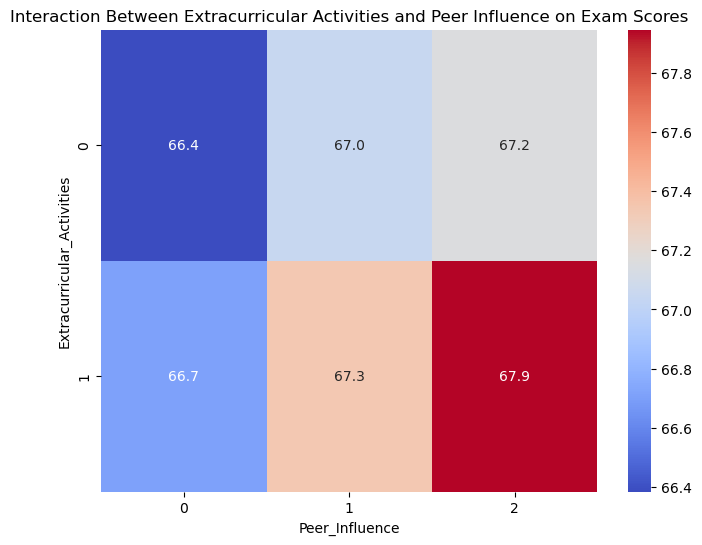

In [18]:
# Create a pivot table for heatmap visualization
pivot_data = df.pivot_table(values='Exam_Score', 
                                    index='Extracurricular_Activities', 
                                    columns='Peer_Influence', 
                                    aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Interaction Between Extracurricular Activities and Peer Influence on Exam Scores')
plt.show()


You could see that the value of **Exam Score** rise as the **Extracurricular Activities** and **Peer Influence** rise in positive. The max value of the Exam Score is the combination of attending the activities and get postive influence by other peers. On the other side, the minimum value of the Exam Score is the combination of not attending the extra activities and get negative influence by peers.

### 6. Can we classify students into "High" and "Low" performers using a combination of features, and if so, which features are the most important?

**Purpose**: Aims to build a binary classification model to categorize students based on their exam performance and identify key factors influencing their performance.

**Steps**:
* **Data Preprocessing**: Create a binary target variable by defining high and low performers based on a threshold (e.g., median exam score), process and encode features appropriately.
* **Modeling**:  Train a classification model (e.g., Logistic Regression, Random Forest, or Support Vector Machine) to classify students as "High" or "Low" performers.
* **Evaluation**: Evaluate which features most influence the classification decision and assess the model's performance using accuracy, precision, recall, and F1-score.

### 7. What are the effects of "Gender" and "Peer Influence" on the academic performance of students, particularly on "Exam Score"?

**Purpose**: Explores whether gender and peer influence significantly affect students' exam scores, considering possible interactions between these factors.

**Steps**:
* **Data Preprocessing**: Convert categorical variables into numeric values.
* **Interaction Analysis**: Investigate potential interactions between "Gender" and "Peer Influence" using interaction terms in a regression model.
* **ANOVA/Regression**: Use ANOVA or a regression model to assess the significance of these factors.
* **Visualization**: Create interaction plots to visualize the effects of "Gender" and "Peer Influence" on "Exam_Score".

### 8. How do students' "Distance from Home" and "Sleep Hours" correlate with their academic performance, and what patterns emerge across different "School Types"?

**Purpose**: This question explores how distance from home and sleep hours contribute to exam scores, with consideration for varying patterns across school types (public or private).

**Steps**:
* **Data Preprocessing**: Handle categorical variables like "Distance from Home" and "School Type".
* **Grouping**: Group the data by "School Type" and analyze the correlation between "Distance from Home", "Sleep Hours", and "Exam Score" within each group.
* **Visualizations**: Use scatter plots or grouped bar charts to visualize the correlation and potential patterns across school types.

### 9. Can we predict the likelihood of high exam scores (≥ 70) using family background (income, parental education, parental involvement) and student behavior (attendance, extracurricular activities, motivation level)?

**Purpose**: Build a predictive model to forecast students' likelihood of achieving high exam scores based on socio-economic and behavioral factors.

**Steps**:
* **Feature Engineering**: Convert socio-economic and behavioral variables into numerical features, and define the target variable as Exam_Score ≥ 80 (binary classification).
* **Modeling**: Use classification models (e.g., Logistic Regression, XGBoost) to predict whether a student will achieve high performance.
* **Evaluation**: Assess model performance using metrics such as accuracy, precision, recall, and ROC-AUC.
* **Visualization**: Visualize decision boundaries or feature importance.
* **Statistical Tests**: Test the significance of the model's features using hypothesis testing or regression analysis.

#### Data Preparing

We split the data set into train and test set to train for the model, as well as create the label for the **Exam Score** for the threshold (≥ 70) as the threshold with 80 is kinda low for the model to learn the data.

In [19]:
# Encoding categorical variables to numerical values using LabelEncoder or predefined mappings
Q_9 = df.copy()

# Create the target variable High_Score: 1 if Exam_Score >= 80, else 0
Q_9['High_Score'] = Q_9['Exam_Score'].apply(lambda x: 1 if x >= 70 else 0)

# Selecting the features for the model
features = ['Family_Income', 'Parental_Education_Level', 'Parental_Involvement', 'Attendance', 
            'Extracurricular_Activities', 'Motivation_Level']
X = Q_9[features]
y = Q_9['High_Score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Display the first few rows of the features and target variable
Q_9[['High_Score'] + features].head()


,High_Score,Family_Income,Parental_Education_Level,Parental_Involvement,Attendance,Extracurricular_Activities,Motivation_Level
0,0,0,0,0,84,0,0
1,0,1,1,0,64,0,0
2,1,1,2,1,98,1,1
3,1,1,0,0,89,1,1
4,1,1,1,1,92,1,1


#### Model Prediction

For the classification label (0 and 1), we will using the famous binary classification regression, Logisitic Regression to predict the **High Score** label.

In [20]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Output the evaluation metrics
print("Accuracy:" ,accuracy)
print("F1 Score:" ,f1)
print("ROC_AUC:" ,roc_auc)

Accuracy: 0.8205329153605015
F1 Score: 0.558766859344894
ROC_AUC: 0.7112734490960139


We could see that the model predict quite good, with **81%** for **Accuracy** and **70%** for **ROC_AUC score**. I think that these features does affect the predict in positive way :>. 

The confusion matrix below will tell more about the prediction result and analyze.

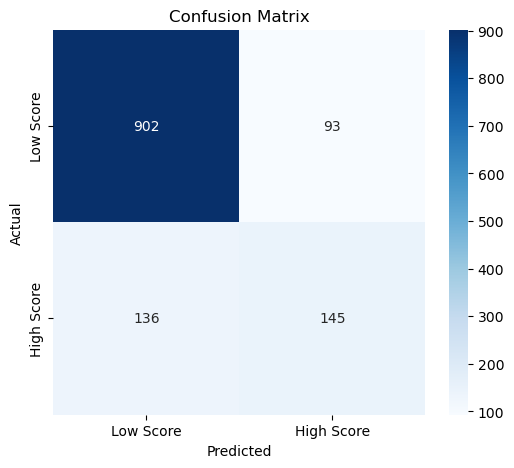

In [21]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Low Score', 'High Score'], yticklabels=['Low Score', 'High Score'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Feature Importance

To find the importance of these features, means that we find the coefficients value in the Logistic Regression Model. Then we will sort these values to see which features contributes most to the model.

In [22]:
# Display the coefficients of the Logistic Regression model
feature_importance = model.coef_[0]
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
importance_df


,Feature,Importance
2,Parental_Involvement,0.628427
5,Motivation_Level,0.365754
4,Extracurricular_Activities,0.321683
0,Family_Income,0.319797
1,Parental_Education_Level,0.292509
3,Attendance,0.139637


We could see that the **family background (income, parental education, parental involvement)** total features are more important than the **student behavior (attendance, extracurricular activities, motivation level)** features. This could likely explain that the Family Background alone is always more important and affect more in **Exam High Score**, especially with the **Parental Involvement**. Although we think that **Attendance** is the most important features if we look at the big Heatmap plot above, but I think it only affect when we predict the exact score, as it's only accurate when we want to get the exact score of the student, but when we want to predict whether the score will be high or not, the **Attendace** will not that affective because if you attend enough class, it just ensure your score will pass the class, but not getting the highest.